In [1]:
import os
import skimage
from skimage import data,io,exposure
import matplotlib.pyplot as plt

## 实验一

实验内容：
加载图片 -> 图像处理（调整色彩亮度、去噪模糊） -> 保存图片

参考： https://scikit-image.org/docs/stable/auto_examples/index.html

### 1 加载图片

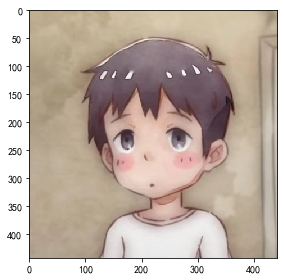

In [2]:
my_dir = "E:/CV/code/data"
file = os.path.join(my_dir, 'icon.png')
my_img = io.imread(file)
io.imshow(my_img)
io.show()

### 2 图像处理

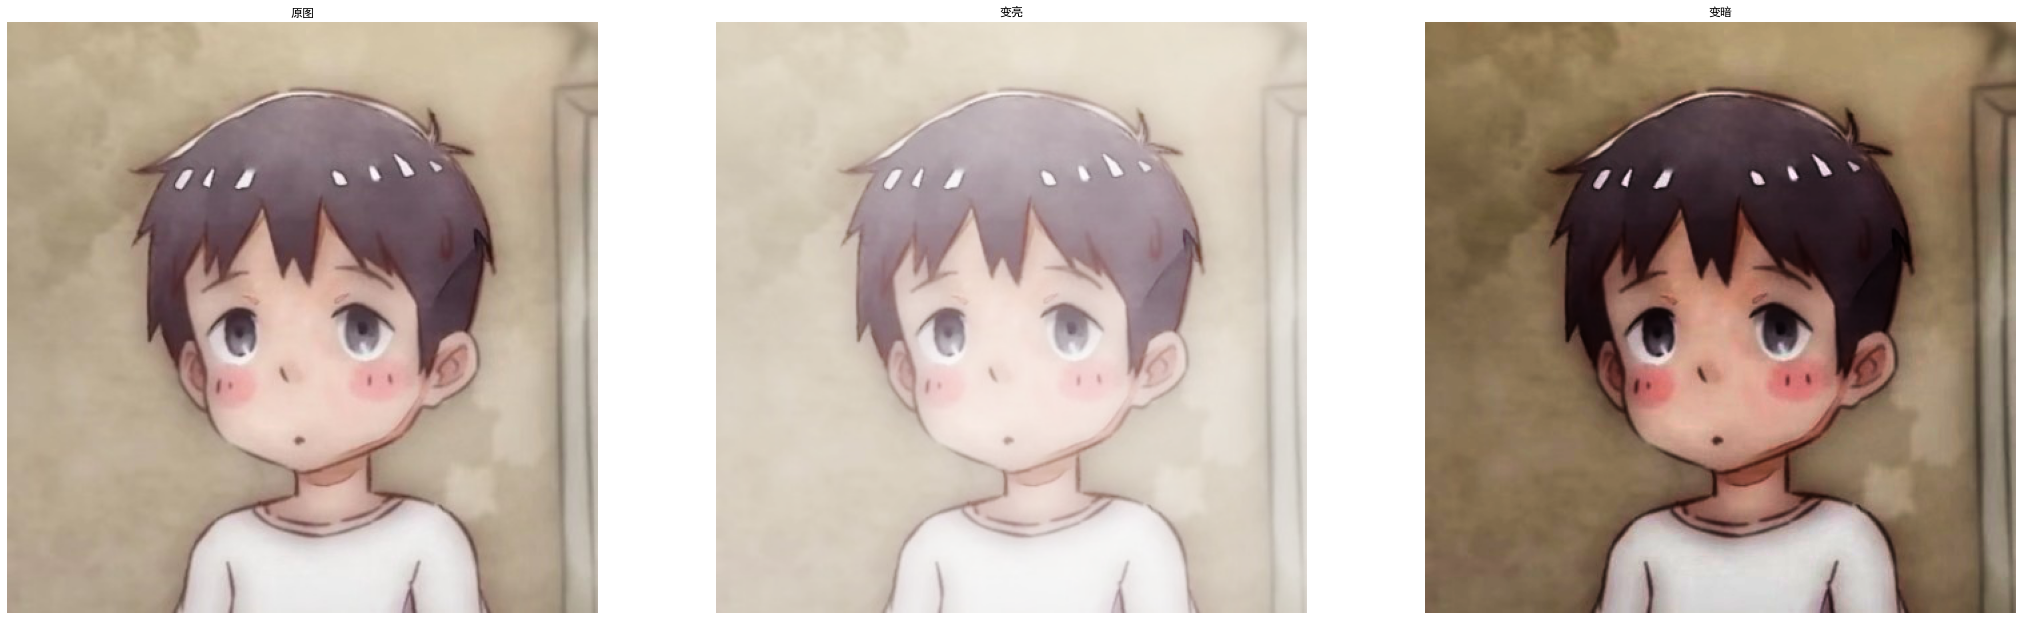

In [12]:
# 调整色彩亮度
figure_adjust_low = exposure.adjust_gamma(my_img,2)
figure_adjust_high = exposure.adjust_gamma(my_img,0.5)
# 当系数大于一是图像变暗，图像小于一时图像变亮
plt.figure(figsize=(36,36))
plt.subplot(131)
plt.axis('off')
plt.title("原图")
plt.imshow(my_img)
plt.subplot(132)
plt.axis('off')
plt.title("变亮")
plt.imshow(figure_adjust_high)
plt.subplot(133)
plt.axis('off')
plt.title("变暗")
plt.imshow(figure_adjust_low)
plt.show()


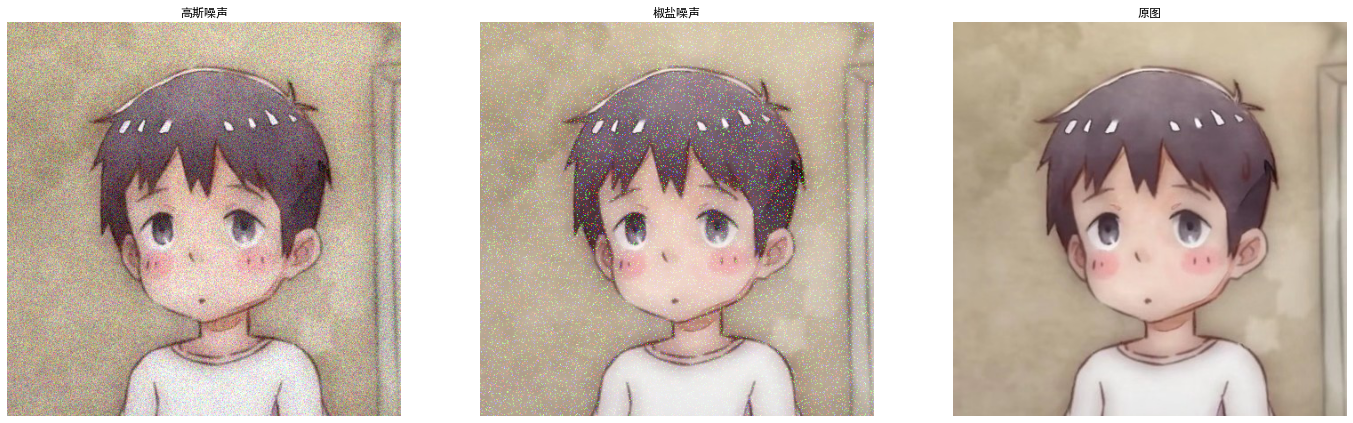

In [15]:
# 添加高斯噪声和椒盐噪声
from skimage.util import random_noise
gauss_noise_img = random_noise(my_img, mode='gaussian')# 添加10%的高斯噪声
salt_noise_img = random_noise(my_img, mode='salt')  # 添加椒盐噪声

plt.figure(figsize=(24,16))
plt.subplot(131)
plt.imshow(gauss_noise_img)
plt.axis('off')
plt.title("高斯噪声")
plt.subplot(132)
plt.imshow(salt_noise_img)
plt.axis('off')
plt.title("椒盐噪声")
plt.subplot(133)
plt.axis('off')
plt.title("原图")
plt.imshow(my_img)

plt.show()

In [25]:
# 使用三种滤波器去噪
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma)

# 双边滤波
denoise_bl_gauss_noise_img = denoise_bilateral(gauss_noise_img, sigma_color=0.05, sigma_spatial=15, multichannel=True)
denoise_bl_salt_noise_img = denoise_bilateral(salt_noise_img, sigma_color=0.05, sigma_spatial=15, multichannel=True)
denoise_bl_original_img = denoise_bilateral(my_img, sigma_color=0.05, sigma_spatial=15, multichannel=True)
#小波去噪滤波器
denoise_wl_gauss_noise_img = denoise_wavelet(gauss_noise_img, multichannel=True) 
denoise_wl_salt_noise_img = denoise_wavelet(salt_noise_img, multichannel=True) 
denoise_wl_original_img = denoise_wavelet(my_img, multichannel=True) 
#总变化滤波器
denoise_tv_gauss_noise_img = denoise_tv_chambolle(gauss_noise_img, weight=0.1, multichannel=True) 
denoise_tv_salt_noise_img = denoise_tv_chambolle(salt_noise_img, weight=0.1, multichannel=True) 
denoise_tv_original_img = denoise_tv_chambolle(my_img, weight=0.1, multichannel=True)


ipykernel_launcher:9: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
ipykernel_launcher:10: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
ipykernel_launcher:11: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.


NameError: name 'denois_bl_original_img' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

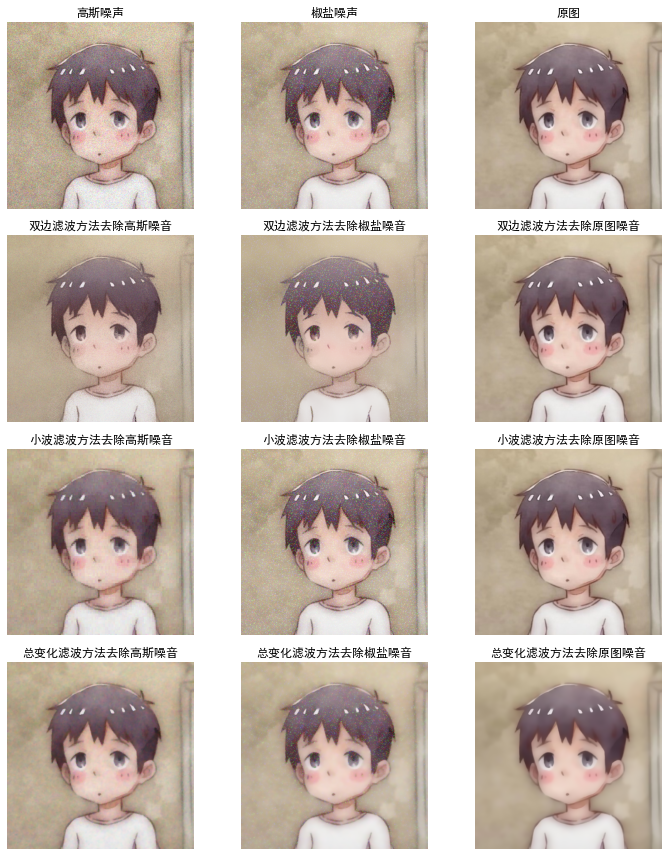

In [34]:
# 可视化
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(10, 12),
                       sharex=True, sharey=True)

ax[0,0].imshow(gauss_noise_img)
ax[0,0].axis('off')
ax[0,0].set_title("高斯噪声")
ax[0,1].imshow(salt_noise_img)
ax[0,1].axis('off')
ax[0,1].set_title("椒盐噪声")
ax[0,2].imshow(my_img)
ax[0,2].axis('off')
ax[0,2].set_title("原图")

ax[1,0].imshow(denoise_bl_gauss_noise_img)
ax[1,0].axis('off')
ax[1,0].set_title("双边滤波方法去除高斯噪音")
ax[1,1].imshow(denoise_bl_salt_noise_img)
ax[1,1].axis('off')
ax[1,1].set_title("双边滤波方法去除椒盐噪音")
ax[1,2].imshow(denoise_bl_original_img)
ax[1,2].axis('off')
ax[1,2].set_title("双边滤波方法去除原图噪音")

ax[2,0].imshow(denoise_wl_gauss_noise_img)
ax[2,0].axis('off')
ax[2,0].set_title("小波滤波方法去除高斯噪音")
ax[2,1].imshow(denoise_wl_salt_noise_img)
ax[2,1].axis('off')
ax[2,1].set_title("小波滤波方法去除椒盐噪音")
ax[2,2].imshow(denoise_wl_original_img)
ax[2,2].axis('off')
ax[2,2].set_title("小波滤波方法去除原图噪音")

ax[3,0].imshow(denoise_tv_gauss_noise_img)
ax[3,0].axis('off')
ax[3,0].set_title("总变化滤波方法去除高斯噪音")
ax[3,1].imshow(denoise_tv_salt_noise_img)
ax[3,1].axis('off')
ax[3,1].set_title("总变化滤波方法去除椒盐噪音")
ax[3,2].imshow(denoise_tv_original_img)
ax[3,2].axis('off')
ax[3,2].set_title("总变化滤波方法去除原图噪音")
fig.tight_layout()
# 保存图片
plt.savefig("高斯椒盐噪声去燥前后对比图.png")
plt.show()
